In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\G Supriya\OneDrive\Desktop\vivek\Prodigy_DS_internship\Task5\archive\global_traffic_accidents.csv")

In [3]:
df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accident ID        10000 non-null  object 
 1   Date               10000 non-null  object 
 2   Time               10000 non-null  object 
 3   Location           10000 non-null  object 
 4   Latitude           10000 non-null  float64
 5   Longitude          10000 non-null  float64
 6   Weather Condition  10000 non-null  object 
 7   Road Condition     10000 non-null  object 
 8   Vehicles Involved  10000 non-null  int64  
 9   Casualties         10000 non-null  int64  
 10  Cause              10000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


In [5]:
df["Road Condition"].value_counts()

Road Condition
Dry                   1729
Gravel                1702
Wet                   1680
Icy                   1653
Snowy                 1618
Under Construction    1618
Name: count, dtype: int64

# Data Visualization

Text(0.5, 1.0, 'Road Contions Vs Accidents')

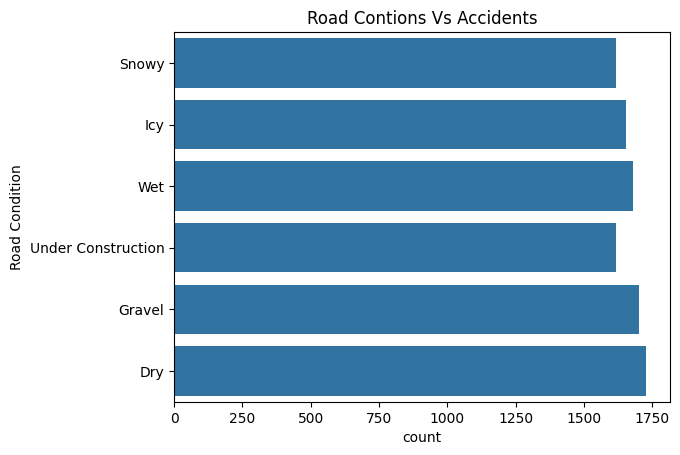

In [6]:
sns.countplot(df["Road Condition"])
plt.title("Road Contions Vs Accidents")

In [7]:
df["Cause"].value_counts()

Cause
Drunk Driving         1716
Reckless Driving      1685
Weather Conditions    1657
Speeding              1656
Mechanical Failure    1653
Distracted Driving    1633
Name: count, dtype: int64

Text(0.5, 1.0, 'Causes of Accidents VS Number of Accidents')

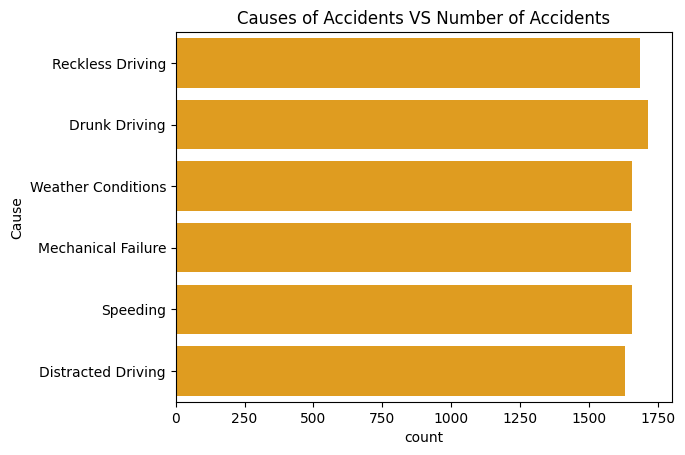

In [8]:
sns.countplot(df["Cause"],color="orange")
plt.title("Causes of Accidents VS Number of Accidents")

In [9]:
df["Weather Condition"].value_counts()

Weather Condition
Rain     1681
Clear    1674
Hail     1673
Snow     1667
Fog      1660
Storm    1645
Name: count, dtype: int64

Text(0.5, 1.0, 'Weather Conditions Vs Number of Accidents')

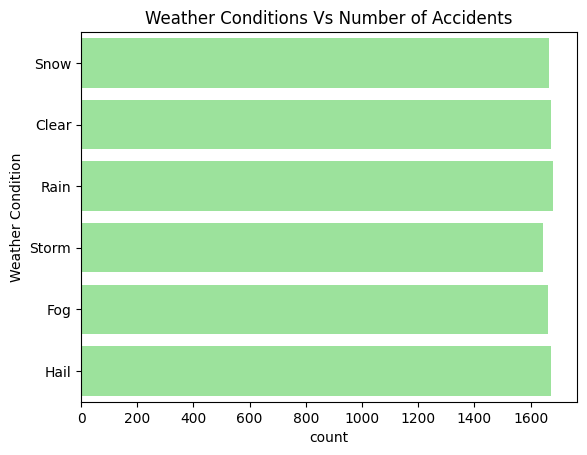

In [10]:
sns.countplot(df["Weather Condition"],color="lightgreen")
plt.title("Weather Conditions Vs Number of Accidents")

In [11]:
df["Location"].unique()

array(['Mumbai, India', 'São Paulo, Brazil', 'Sydney, Australia',
       'Tokyo, Japan', 'Beijing, China', 'Paris, France', 'London, UK',
       'Toronto, Canada', 'Berlin, Germany', 'New York, USA'],
      dtype=object)

<Axes: ylabel='count'>

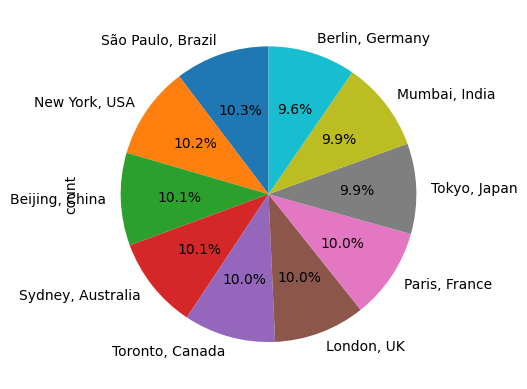

In [12]:
location_counts=df["Location"].value_counts()
location_counts.plot(kind="pie",autopct='%1.1f%%',startangle=90)

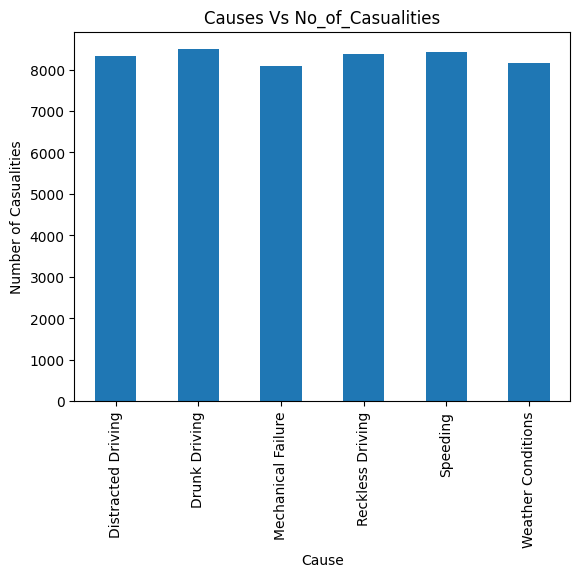

In [13]:
No_of_Casualties_causes=df.groupby("Cause")["Casualties"].sum()
No_of_Casualties_causes.plot(kind="bar")
plt.ylabel("Number of Casualities")
plt.title("Causes Vs No_of_Casualities")
plt.show()

<Axes: ylabel='Vehicles Involved'>

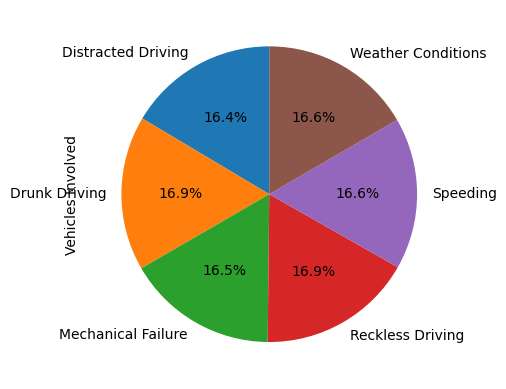

In [14]:
No_of_vehicles_per_cause=df.groupby("Cause")["Vehicles Involved"].sum()
No_of_vehicles_per_cause.plot(kind="pie",autopct='%1.1f%%',startangle=90)

Text(0.5, 1.0, 'Number of Vehicles Vs Causes')

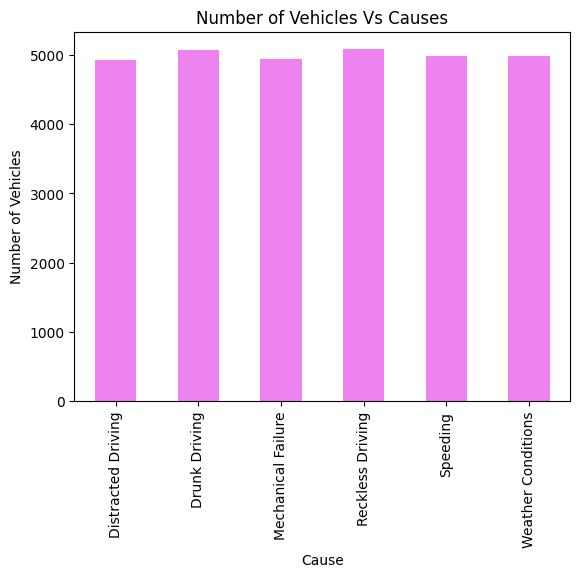

In [15]:
No_of_vehicles_per_cause.plot(kind="bar",color="violet")
plt.ylabel("Number of Vehicles")
plt.title("Number of Vehicles Vs Causes")

In [16]:
df["Vehicles Involved"].sum()

29991

In [17]:
df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


In [18]:
df.columns

Index(['Accident ID', 'Date', 'Time', 'Location', 'Latitude', 'Longitude',
       'Weather Condition', 'Road Condition', 'Vehicles Involved',
       'Casualties', 'Cause'],
      dtype='object')

In [19]:
def classify_risk(x):
    if x <= 1:
        return 'Low'
    elif 1 < x <= 3:
        return 'Medium'
    else:
        return 'High'

df['Risk_Level'] = df['Casualties'].apply(classify_risk)

In [20]:
df["Risk_Level"].value_counts()

Risk_Level
High      6383
Medium    1849
Low       1768
Name: count, dtype: int64

In [21]:
df.columns

Index(['Accident ID', 'Date', 'Time', 'Location', 'Latitude', 'Longitude',
       'Weather Condition', 'Road Condition', 'Vehicles Involved',
       'Casualties', 'Cause', 'Risk_Level'],
      dtype='object')

In [22]:
df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause,Risk_Level
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving,High
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving,Low
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving,High
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving,Low
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving,High


In [23]:
df.describe()

,Latitude,Longitude,Vehicles Involved,Casualties
count,10000.000000,10000.000000,10000.000000,10000.00000
mean,-0.543557,0.338573,2.999100,4.98820
std,51.917928,103.379168,1.408935,3.13015
min,-89.985688,-179.961984,1.000000,0.00000
25%,-45.426619,-88.231733,2.000000,2.00000
50%,-1.080556,-0.682727,3.000000,5.00000
75%,44.137309,89.973059,4.000000,8.00000
max,89.990081,179.981695,5.000000,10.00000


In [24]:
df.drop(columns=["Accident ID"],inplace=True)

In [25]:
import datetime
df["Month"]=pd.to_datetime(df['Date'], errors='coerce').dt.month
df["Hour"]=pd.to_datetime(df["Time"],errors="coerce").dt.hour

C:\Users\G Supriya\AppData\Local\Temp\ipykernel_12776\2115309209.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"]=pd.to_datetime(df["Time"],errors="coerce").dt.hour


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   Time               10000 non-null  object 
 2   Location           10000 non-null  object 
 3   Latitude           10000 non-null  float64
 4   Longitude          10000 non-null  float64
 5   Weather Condition  10000 non-null  object 
 6   Road Condition     10000 non-null  object 
 7   Vehicles Involved  10000 non-null  int64  
 8   Casualties         10000 non-null  int64  
 9   Cause              10000 non-null  object 
 10  Risk_Level         10000 non-null  object 
 11  Month              10000 non-null  int32  
 12  Hour               10000 non-null  int32  
dtypes: float64(2), int32(2), int64(2), object(7)
memory usage: 937.6+ KB


In [27]:
df.drop(columns=["Date","Time"],inplace=True)

In [28]:
df.head()

,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause,Risk_Level,Month,Hour
0,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving,High,4,6
1,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving,Low,1,2
2,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving,High,4,2
3,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving,Low,10,11
4,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving,High,1,12


In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
categorical_cols=df.select_dtypes(include="object").columns
for col in categorical_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [31]:
df.head()

,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause,Risk_Level,Month,Hour
0,3,13.488432,-73.290682,4,3,5,7,3,0,4,6
1,7,-37.798317,-32.244242,0,2,4,1,1,1,1,2
2,6,33.767869,104.869018,3,3,1,7,3,0,4,2
3,8,-0.378031,-165.825855,5,5,4,0,1,1,10,11
4,0,41.254879,-30.776959,5,3,3,9,3,0,1,12


In [32]:
features=["Location","Weather Condition","Road Condition","Vehicles Involved","Cause","Casualties","Month","Hour"]
X=df[features]
y=df["Risk_Level"]

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
model=LogisticRegression(random_state=42)

In [35]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [36]:
compared_df=pd.DataFrame({"Actual values":y_test,"Predicted values":y_pred})
compared_df.head()

,Actual values,Predicted values
6252,0,0
4684,1,1
1731,0,0
4742,0,0
4521,0,0


In [37]:
confusion_matrixs=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[1218    0    0]
 [   0  371    0]
 [   0    0  411]]


In [38]:
print("classification report:\n",classification_report(y_test,y_pred))

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       1.00      1.00      1.00       371
           2       1.00      1.00      1.00       411

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<Axes: >

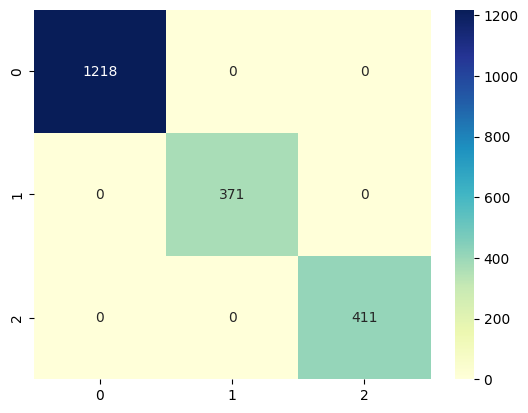

In [39]:
sns.heatmap(confusion_matrixs,annot=True, fmt='d', cmap='YlGnBu', xticklabels=model.classes_, yticklabels=model.classes_)